In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("LoanData_Preprocessed_v1.2.csv") 
data

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,29,11,7,32.000000,6.0,0.927360,0.992640,1,0
1,28,1,3,26.000000,12.4,0.377208,2.846792,4,0
2,34,16,3,75.000000,10.4,3.954600,3.845400,1,0
3,51,31,14,249.000000,7.8,4.272840,15.149160,2,0
4,40,13,11,102.000000,18.9,6.226794,13.051206,2,1
...,...,...,...,...,...,...,...,...,...
480,41,16,17,68.000000,5.4,0.447984,3.224016,1,0
481,23,0,1,42.000000,3.9,1.018836,0.619164,2,1
482,47,26,21,100.000000,12.8,4.582400,8.217600,1,0
483,24,7,0,18.000000,6.5,0.526500,0.643500,1,0


This is a preproccessed data set but just to check if there any missing values:

In [22]:
data.isnull().sum()

age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64

age            int64
employ         int64
address        int64
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
ed             int64
default     category
dtype: object


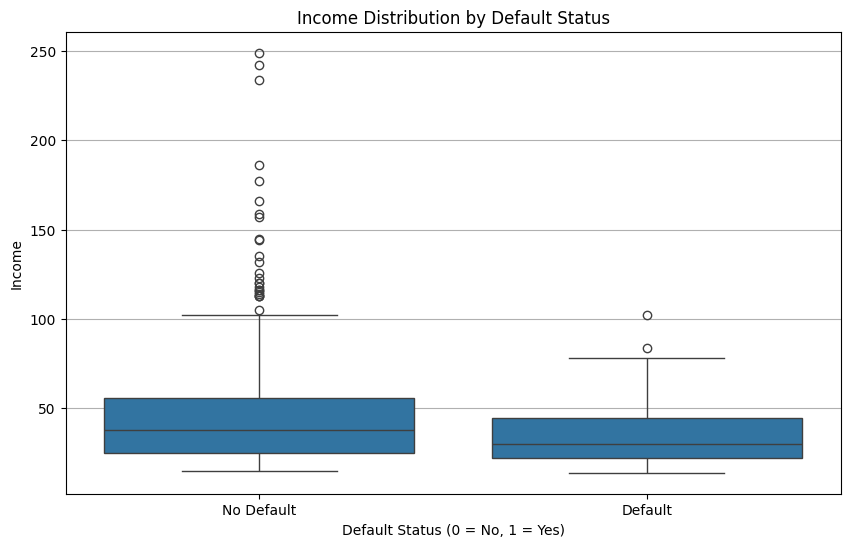

In [24]:

print(data.dtypes)
data['default'] = data['default'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='income', data=data)
plt.title('Income Distribution by Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y')
plt.show()


Education level corresponds to the highest level of education of a person, 1 being the lowest corresponding to High school, 2 = Undergraduate, 3=Graduate, 4=Postgraduate, 5+=Beyond

/var/folders/zj/y_2y230d1z18y9001xkg2qgw0000gn/T/ipykernel_6052/2150766759.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_default_counts = data.groupby(['ed', 'default']).size().reset_index(name='count')


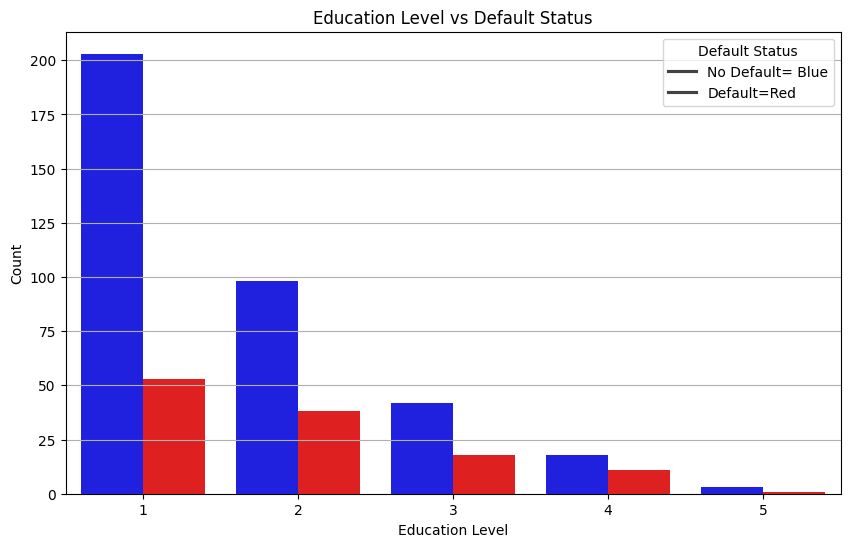

In [31]:
data['default'] = data['default'].astype('category')

# Prepare the data for the count plot
edu_default_counts = data.groupby(['ed', 'default']).size().reset_index(name='count')

# Create a multi-bar chart
plt.figure(figsize=(10, 6))
palette = {0: 'Blue', 1: 'red'}  # Colors for no default and default
sns.barplot(data=edu_default_counts, x='ed', y='count', hue='default', palette=palette)

# Customizing the plot
plt.title('Education Level vs Default Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4','5'])
plt.legend(title='Default Status', labels=['No Default= Blue', 'Default=Red'], loc='upper right')
plt.grid(axis='y')
plt.show()